#Question 1
Two versions of 8-Queens problem using Genetic Algorithm:
the basic version 
and the improved version which uses a modified reproduce function for better performance in terms of time

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#initial population

def Initial_pop(size):
  population=[]
  fixed_row = 3
  for i in range(size):  
    state= []
    for j in range(8):
      state.append(fixed_row)   
    population.append(state)

  return population

In [ ]:
#reproduce

def Reproduce(x,y):
  n = 8
  c = random.randint(1,7)  #both included

  return (x[0:c]+ y[c:8])

In [ ]:
#reproduce improvement

def Reproduce_imp(x,y):
  n = len(x)
  child = [None]*n
  fitness_x = Fitness(x)
  fitness_y = Fitness(y)
  prob_x = fitness_x/(fitness_x+fitness_y)
  prob_y = fitness_y/(fitness_x+fitness_y)

  for i in range(n):
    if (x[i]==y[i]):
      child[i] = x[i]
    else:
      toss = random.uniform(0, 1)
      if (toss<=prob_x):
        child[i] = x[i]
      else:
        child[i] = y[i]
  return child


In [ ]:
#return number of clashing pairs

def Clashing(state):
  n = len(state)
  answer = 0
  row_freq = [0] * n
  md_freq = [0] * (2 * n)
  sd_freq = [0] * (2 * n)

  #for same rows, main diag and secondary diag
  for i in range(n):
    value = state[i]
    row_freq[value] += 1
    md_freq[value + i] += 1
    sd_freq[n - value + i] += 1

  for i in range(n):
    n_queen = row_freq[i]
    answer += (n_queen*(n_queen-1)/2)

  for i in range(2*n):
    answer += (md_freq[i] * (md_freq[i]-1)/2)
    answer += (sd_freq[i]* (sd_freq[i]-1)/2)
     
  return int(answer)
  

In [ ]:
#function that measures the fitness of an individual state
#state is a list of 8 

def Fitness(state):
  fit_val = (28 - Clashing(state)) + 1
  return fit_val
   

In [ ]:
#fuction to return best fitness out of all the states

def Best_Fitness(population, Fitness):
  n = len(population)
  best_val = 0
  best_state = []
  for i in range(n):
    value = Fitness(population[i])
    if (value > best_val):
      best_val = value
      best_state = population[i]

  return (best_val,best_state)

In [ ]:
def Random_sel(population, Fitness):
  n = len(population)
  pop_fitness_frac = [0] * n    #fitness of population
  total_fitness = 0

  for i in range(n):
    state = population[i]
    pop_fitness_frac[i] = Fitness(state)
    total_fitness += pop_fitness_frac[i]
    
  for i in range(n):  
    pop_fitness_frac[i] /= total_fitness

  sample_size = 2
  choice_indices = np.random.choice(len(pop_fitness_frac), size=sample_size, replace=True, p=pop_fitness_frac)

  return choice_indices
  
  

In [ ]:
def Mutate(state):
  pos = random.randint(0,7)   #both included
  new_val = random.randint(0,7)
  state[pos]=new_val

  return state


In [ ]:
import numpy as np

#genetic algorithm

def Genetic_Algo(population, Fitness):
  generation = []
  y_values = []
  generation.append(0)
  y_values.append(1)
  time=0
  best_fitness_val=1
  while ((Best_Fitness(population,Fitness)[0]) != 29):
    #print('fitness value=',Best_Fitness(population,Fitness)[0])
    time += 1
    new_population=[]
    for i in range(20):
      choice_indices = Random_sel(population, Fitness)
      x = population[choice_indices[0]]
      y = population[ choice_indices[1]]
      child = Reproduce(x,y)
      #mutation
      mutate_num = random.uniform(0, 1)
      if(mutate_num<0.1):
        child = Mutate(child)
      new_population.append(child)
           
    population=new_population
    best_fitness_val= Best_Fitness(population, Fitness)[0]
    generation.append(time)
    y_values.append(best_fitness_val)
    if(time>1000):
      break

  print()
  best_val, best_state= Best_Fitness(population, Fitness)
  print("Old Version")
  print('best fitness value=', best_val)
  print('Final best state=', best_state)
  print('generation found=', time)
  return (generation,y_values)
  



In [ ]:
import numpy as np
def Genetic_Algo_imp(population, Fitness):
  generation = []
  y_values = []
  generation.append(0)
  y_values.append(1)
  time=0
  best_fitness_val=1
  while (best_fitness_val != 29):
    #print('fitness value=',Best_Fitness(population,Fitness)[0])
    time += 1
    new_population=[]
    for i in range(40):
      choice_indices = Random_sel(population, Fitness)
      x = population[choice_indices[0]]
      y = population[ choice_indices[1]]
      child = Reproduce_imp(x,y)    #improved version
      #mutation
      mutate_num = random.uniform(0, 1)
      if(mutate_num<0.2):
        child = Mutate(child)
      new_population.append(child)
           
    population=new_population
    best_fitness_val= Best_Fitness(population, Fitness)[0]
    generation.append(time)
    y_values.append(best_fitness_val)
    if(time>1000):
      break

  print()
  best_val, best_state= Best_Fitness(population, Fitness)
  print("Improved Version")
  print('best fitness value=', best_val)
  print('Final best state=', best_state)
  print('generation found=', time)
  return (generation,y_values)
  


Old Version
best fitness value= 26
Final best state= [6, 2, 7, 1, 7, 5, 3, 6]
generation found= 1001

Improved Version
best fitness value= 26
Final best state= [1, 4, 2, 0, 6, 3, 0, 3]
generation found= 1001
Winner: Both


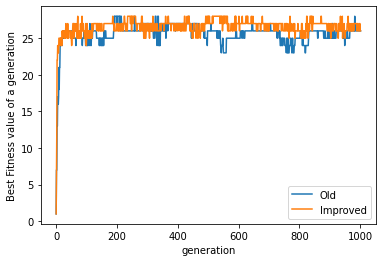


Old Version
best fitness value= 25
Final best state= [7, 2, 3, 1, 4, 7, 0, 0]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [6, 3, 1, 7, 5, 0, 2, 4]
generation found= 650
Winner: New One


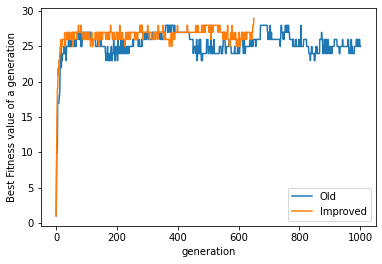


Old Version
best fitness value= 26
Final best state= [5, 0, 2, 7, 6, 6, 3, 0]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [5, 3, 6, 0, 7, 1, 4, 2]
generation found= 102
Winner: New One


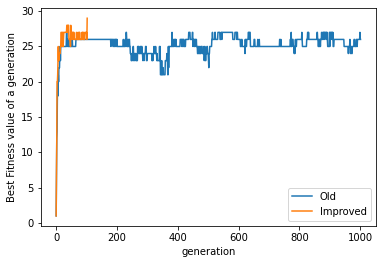


Old Version
best fitness value= 26
Final best state= [5, 1, 1, 7, 0, 7, 0, 4]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [4, 6, 1, 5, 2, 0, 7, 3]
generation found= 750
Winner: New One


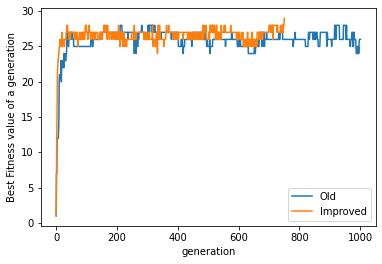


Old Version
best fitness value= 26
Final best state= [3, 1, 7, 5, 2, 6, 4, 3]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [5, 2, 0, 7, 3, 1, 6, 4]
generation found= 893
Winner: New One


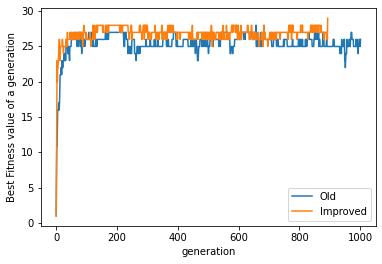


Old Version
best fitness value= 25
Final best state= [2, 7, 5, 2, 1, 3, 6, 4]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [4, 0, 7, 3, 1, 6, 2, 5]
generation found= 166
Winner: New One


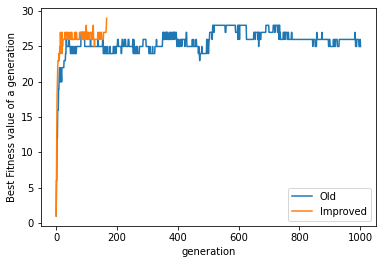


Old Version
best fitness value= 26
Final best state= [6, 4, 0, 1, 3, 7, 2, 3]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [3, 1, 6, 2, 5, 7, 4, 0]
generation found= 439
Winner: New One


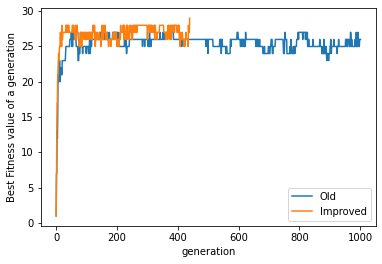


Old Version
best fitness value= 29
Final best state= [2, 4, 1, 7, 0, 6, 3, 5]
generation found= 773

Improved Version
best fitness value= 29
Final best state= [4, 2, 7, 3, 6, 0, 5, 1]
generation found= 330
Winner: New One


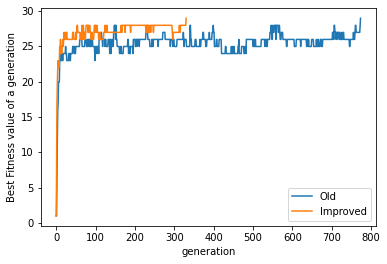


Old Version
best fitness value= 27
Final best state= [1, 5, 2, 6, 7, 3, 4, 0]
generation found= 1001

Improved Version
best fitness value= 29
Final best state= [7, 3, 0, 2, 5, 1, 6, 4]
generation found= 479
Winner: New One


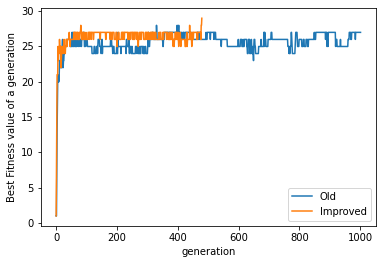


Old Version
best fitness value= 25
Final best state= [5, 3, 0, 6, 7, 1, 2, 5]
generation found= 1001

Improved Version
best fitness value= 27
Final best state= [2, 6, 3, 7, 1, 4, 0, 7]
generation found= 1001
Winner: New One


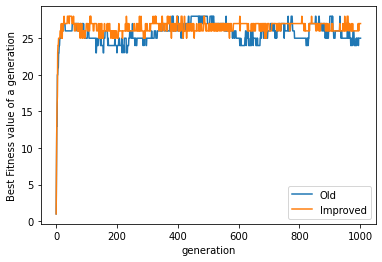

In [ ]:
pop1 = Initial_pop(20)
pop2 = Initial_pop(40)
for i in range(10):
  generation_old,y_values_old = Genetic_Algo(pop1,Fitness)
  generation_new,y_values_new = Genetic_Algo_imp(pop2,Fitness)

  if (y_values_old[-1]>y_values_new[-1]):
    print("Winner: Old one")
  elif (y_values_old[-1]<y_values_new[-1]):
    print("Winner: New One")
  else :
    if (generation_old[-1]<generation_new[-1]):
      print("Winner: Old one")
    elif (generation_old[-1]>generation_new[-1]):
      print("Winner: New One")
    else:
      print("Winner: Both") 
  
  plt.plot(generation_old,y_values_old, label='Old')
  plt.xlabel('generation')
  plt.ylabel('Best Fitness value of a generation')
  plt.plot(generation_new,y_values_new, label='Improved')
  plt.xlabel('generation')
  plt.ylabel('Best Fitness value of a generation')
  plt.legend()
  plt.show()

  

In [ ]:
print(pop1[0])


[2, 2, 2, 2, 2, 2, 2, 2]
